In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pathlib
import joblib
from sklearn.metrics import r2_score, mean_squared_error



In [2]:
#Read the data
gal_csv=pd.read_csv("sqlgalaxy_table.csv")
#Check the columns
gal_csv.columns

Index(['specObjID', 'z', 'class', 'subClass', 'ra', 'dec', 'mjd', 'petroMag_u',
       'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'petroRad_u',
       'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z', 'q_u', 'q_g',
       'q_r', 'q_i', 'q_z', 'u_u', 'u_g', 'u_r', 'u_i', 'u_z', 'deVRad_u',
       'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z', 'deVAB_u', 'deVAB_g',
       'deVAB_r', 'deVAB_i', 'deVAB_z', 'extinction_u', 'extinction_g',
       'extinction_r', 'extinction_i', 'extinction_z', 'u', 'g', 'r', 'i',
       'bptclass', 'oh_p2p5', 'oh_p16', 'oh_p50', 'oh_p84', 'oh_p97p5',
       'lgm_tot_p2p5', 'lgm_tot_p16', 'lgm_tot_p50', 'lgm_tot_p84',
       'lgm_tot_p97p5', 'sfr_tot_p2p5', 'sfr_tot_p16', 'sfr_tot_p50',
       'sfr_tot_p84', 'sfr_tot_p97p5', 'sigma_balmer', 'oii_3726_reqw',
       'oii_3726_flux', 'neiii_3869_reqw', 'neiii_3869_flux', 'h_delta_reqw',
       'h_delta_flux', 'h_gamma_reqw', 'h_gamma_flux', 'oiii_4363_reqw',
       'oiii_4363_flux', 'h_beta_r

In [3]:
#Drop missing and nan vals
gal_csv=gal_csv.dropna()
# Again check missing or null/nan vals
print(gal_csv.isnull())

#print indices of missing vals
missing_indices=gal_csv[gal_csv.isnull().any(axis=1)].index
print("\n")
print(missing_indices)
if len(missing_indices)==0:
	print("Good Data")
else:
	print("Missing Data")


      specObjID      z  class  subClass     ra    dec    mjd  petroMag_u  \
0         False  False  False     False  False  False  False       False   
1         False  False  False     False  False  False  False       False   
2         False  False  False     False  False  False  False       False   
3         False  False  False     False  False  False  False       False   
4         False  False  False     False  False  False  False       False   
...         ...    ...    ...       ...    ...    ...    ...         ...   
4995      False  False  False     False  False  False  False       False   
4996      False  False  False     False  False  False  False       False   
4997      False  False  False     False  False  False  False       False   
4998      False  False  False     False  False  False  False       False   
4999      False  False  False     False  False  False  False       False   

      petroMag_g  petroMag_r  ...  h_alpha_reqw  h_alpha_flux  nii_6584_reqw  \
0      

In [16]:
#Drop specific cols not relevant
exclude_columns=["specObjID", "class", "subClass", "ra", "dec", "mjd"]
gal_csv_exc=gal_csv.drop(columns=exclude_columns)

In [17]:
# Standardize and scale the data
scaler = StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(gal_csv_exc), 
						 columns=gal_csv_exc.columns)
scaled_data


,z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,...,h_alpha_reqw,h_alpha_flux,nii_6584_reqw,nii_6584_flux,sii_6717_reqw,sii_6717_flux,sii_6731_reqw,sii_6731_flux,ariii7135_reqw,ariii7135_flux
0,-0.959967,0.582590,0.585896,0.415667,0.259705,0.188773,-0.107777,-0.295741,-0.361010,-0.322711,...,0.879272,-0.014147,0.543889,-0.014146,0.442246,-0.014599,0.157501,-0.014148,0.317146,-0.014134
1,0.176855,0.174266,0.272878,0.078313,-0.053905,-0.167070,0.129490,-0.072141,-0.077262,-0.109165,...,0.798154,-0.014145,0.447296,-0.014145,0.223001,-0.014596,0.316359,-0.014145,-1.103537,-0.014134
2,-1.053398,-0.480416,-0.843776,-0.931610,-1.035380,-0.972820,-0.073928,0.314192,0.498218,0.450318,...,-0.205018,-0.014143,0.062029,-0.014144,0.045734,-0.014593,-0.287626,-0.014141,-0.493920,-0.014134
3,0.348318,-0.096729,-0.178345,-0.189084,-0.180103,-0.198014,-0.211525,-0.172987,-0.132451,-0.157489,...,-0.074733,-0.014144,-0.213374,-0.014144,0.940223,-0.014601,0.739603,-0.014152,-0.044859,-0.014134
4,0.559707,0.529718,0.632513,0.641117,0.584425,0.528310,-0.342102,-0.513299,-0.566480,-0.569066,...,0.015271,-0.014146,-0.329923,-0.014145,0.089014,-0.014600,-0.203273,-0.014148,-0.978439,-0.014134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.352915,-3.259077,-3.548917,-3.818975,-3.739214,-3.513834,2.249268,2.322079,2.750255,2.895210,...,1.348127,-0.014140,0.520792,-0.014136,1.489166,-0.014594,1.427471,-0.014137,0.201804,-0.014134
4996,0.294255,-0.195497,0.026178,0.081424,0.012917,-0.077942,0.002432,-0.185556,-0.239035,-0.246070,...,-0.908562,-0.014142,-0.680041,-0.014143,-0.422693,-0.014594,-0.478861,-0.014142,0.091099,-0.014134
4997,0.614359,-0.138165,-0.011237,0.036135,0.048024,0.079382,-0.290715,-0.451009,-0.465139,-0.465128,...,-0.484861,-0.014143,-0.607698,-0.014143,0.300184,-0.014598,0.410719,-0.014149,0.324102,-0.014134
4998,-0.030526,-0.799500,-1.000050,-1.003329,-0.933604,-0.871725,-0.017539,0.500738,0.567215,0.532569,...,0.730220,-0.014146,0.505920,-0.014145,0.777584,-0.014601,0.745041,-0.014151,0.368321,-0.014134


In [40]:
#split the data into targetter variable and features
features=scaled_data.drop(columns=["sfr_tot_p50"])
target=scaled_data["sfr_tot_p50"]
xtrain, xtest, ytrain, ytest=train_test_split(features,target, test_size=0.2)

In [41]:
#Init the model and make predictions
model=SVR()
model.fit(xtrain, ytrain)
ypred=model.predict(xtest)
#save the model with joblib
joblib.dump(model, "star_formation_prediction_svr_model.pkl")


['star_formation_prediction_svr_model.pkl']

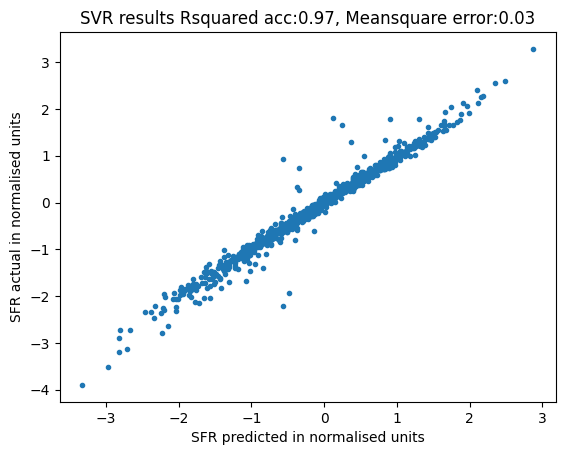

In [42]:
#Test how pred and actual data correlate
# Accurary check 
r_squared = r2_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)


plt.xlabel("SFR predicted in normalised units")
plt.ylabel("SFR actual in normalised units")
plt.title("SVR results Rsquared acc:{0:.2f}, Meansquare error:{1:.2f}".format(r_squared, mse))
plt.scatter(ypred,ytest, marker=".")

In [43]:
#Use this to load the model at a later stage
"""
load_model=joblib.load("star_formation_prediction_svr_model.pkl")
new_pred=load_model.predict(new_data)
"""

'\nload_model=joblib.load("star_formation_prediction_svr_model.pkl")\nnew_pred=load_model.predict(new_data)\n'